In [1]:
import cycledata as cd
import zipfile
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [4]:
year = "2012"
directory = 'D:\Documents\GitHub\SmartCity\CycleData'
ExtractFiles(directory)
DFs = ReadFiles(directory + '\\' + year)
DFdays = DayAverage(DFs)

The current folder is D:\Documents\GitHub\SmartCity\CycleData
FILE INSIDE D:\Documents\GitHub\SmartCity\CycleData: cyclehireusagestats-2012.zip
Reading: 1. Journey Data Extract 04Jan-31Jan 12.csv
Reading: 10. Journey Data Extract 21Aug-22 Aug12.csv
Reading: 11. Journey Data Extract 23Aug-25 Aug12.csv
Reading: 12. Journey Data Extract 26Aug-27 Aug12.csv
Reading: 13. Journey Data Extract 28Aug-29 Aug12.csv
Reading: 14. Journey Data Extract 30Aug-31 Aug12.csv
Reading: 15. Journey Data Extract 01Sep-30Sep12.csv
Reading: 16. Journey Data Extract 01Oct-31Oct12.csv
Reading: 17. Journey Data Extract 01Nov-30Nov12.csv
Reading: 18. Journey Data Extract 01Dec-31Dec12.csv
Reading: 2. Journey Data Extract_01Feb-29Feb 12.csv
Reading: 3. Journey Data Extract_01Mar-31Mar12.csv
Reading: 4. Journey Data Extract_1Apr-28Apr12.csv
Reading: 5. Journey Data Extract_29Apr-26May12.csv
Reading: 6. Journey Data Extract_27May-23Jun12.csv
Reading: 7. Journey Data Extract_24Jun-21Jul12.csv
Reading: 8. Journey Data 

C:\Users\George Boss\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3006: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


ValueError: labels ['s_id'] not contained in axis

In [33]:
# Potential error if folder structure exists
# Use within EMPTY directory
DFdays = DFs.set_index('s_date')
DFdays.head()
DFdays.drop(['e_id', 's_id', 'Duration', 'e_date'], axis=1, inplace=True)
DFdays = DFdays.resample('1D', how='sum')
DFdays.head()
# DFs.head()


,Count
s_date,
1900-01-09,1
1900-01-10,NaN
1900-01-11,NaN
1900-01-12,NaN
1900-01-13,NaN


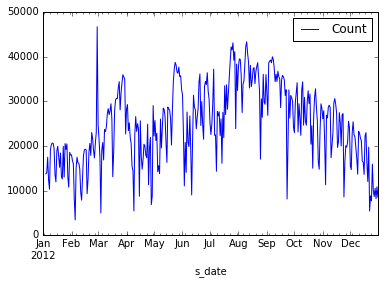

In [61]:
DFdays = DFdays['1-2012':'12-2012']
DFdays.plot()
DFdays.to_csv("2012DailyUse.csv")

In [55]:
# Find Erroneuos dates
years = pd.datetime(2012,1,1)
row_index = DFs.s_date.apply(lambda x: x.year != years.year)
newDF = DFs.loc[row_index, ['e_date', 'e_id', 's_date', 's_id']]
newDF.head()
# Remove all entries where s_id > 781
row_index = DFs.s_id.apply(lambda x: x < 782)

,e_date,e_id,s_date,s_id
20783,2012-06-05 12:06:16,434,1901-03-22,200054
45106,2012-06-07 19:46:00,346,1901-04-30,22174
46980,2012-06-18 11:05:46,434,1900-07-20,1102
94433,2012-06-04 09:16:02,346,1901-07-19,200141
113000,2012-06-19 12:28:46,346,1900-04-23,1050


In [4]:
November = pd.read_csv("fulltest.csv", parse_dates=[1, 3], dayfirst=True,
                              usecols=[1, 3, 4, 6, 7], na_values=0,
                              names=['Duration', 'e_date', 'e_id', 's_date', 's_id'],
                              header=None, skiprows=1).dropna()
# Filter to specific station
row_index = (November.s_id == 14) | (November.e_id == 14)
Station14 = November.loc[row_index, ['e_date', 'e_id', 's_date', 's_id']]
Station14.head()

fullE = FormatEntries(Station14, 14)
fullEx = FormatExits(Station14, 14)

WeekE, WeekEx = SeperateWeek(Station14, 14)
del WeekEx.index.name
del WeekE.index.name
del fullE.index.name
del fullEx.index.name
fullE.head()

,s_id
2012-11-01 04:30:00,1
2012-11-01 05:00:00,1
2012-11-01 05:30:00,2
2012-11-01 06:00:00,3
2012-11-01 06:30:00,10


In [6]:
result = CalcDiff(WeekE, WeekEx)
full_result = CalcDiff(fullE, fullEx)
full_result.head

<bound method DataFrame.head of                      s_id  e_id  count_diff
2012-11-01 04:30:00     1     0           1
2012-11-01 05:00:00     1     2          -1
2012-11-01 05:30:00     2     1           1
2012-11-01 06:00:00     3     1           2
2012-11-01 06:30:00    10     0          10
2012-11-01 07:00:00    20     2          18
2012-11-01 07:30:00    62     3          59
2012-11-01 08:00:00    56     7          49
2012-11-01 08:30:00    42     6          36
2012-11-01 09:00:00    17     5          12
2012-11-01 09:30:00     7     3           4
2012-11-01 10:00:00    10     1           9
2012-11-01 10:30:00     4     3           1
2012-11-01 11:00:00     3     1           2
2012-11-01 11:30:00     0     2          -2
2012-11-01 12:00:00     5     7          -2
2012-11-01 12:30:00     4     3           1
2012-11-01 13:00:00     0     2          -2
2012-11-01 13:30:00     2     2           0
2012-11-01 14:00:00     2     2           0
2012-11-01 14:30:00     3     5          -2


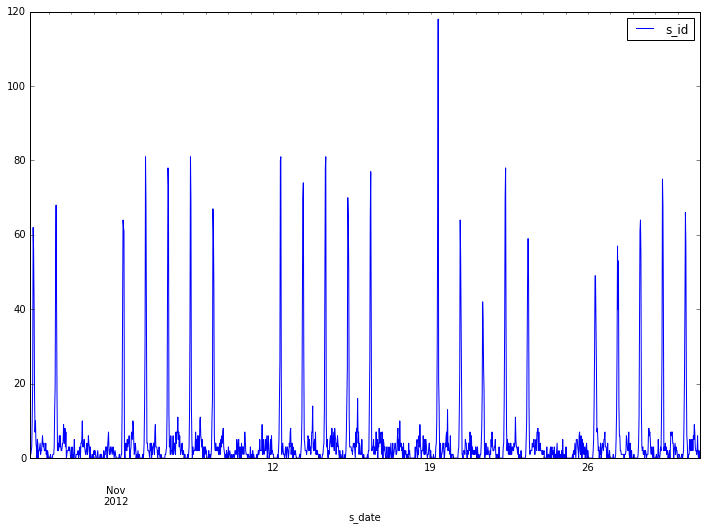

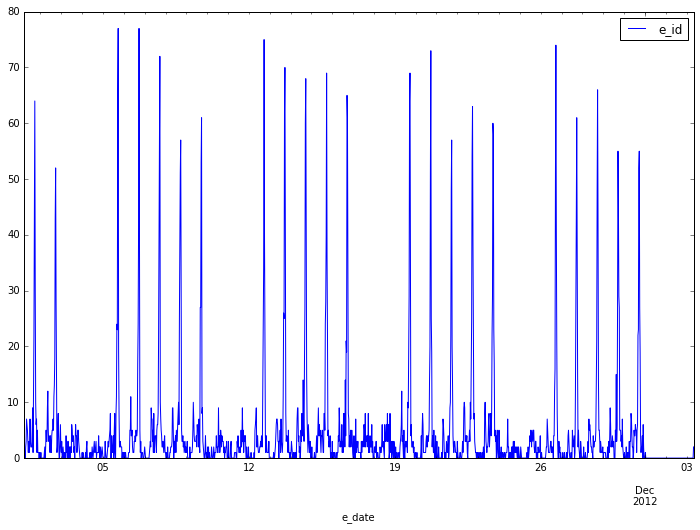

In [55]:
# Plots of Full Month (30min Aggregates)
fullE.plot(figsize=(12,8))
fullEx.plot(figsize=(12,8))

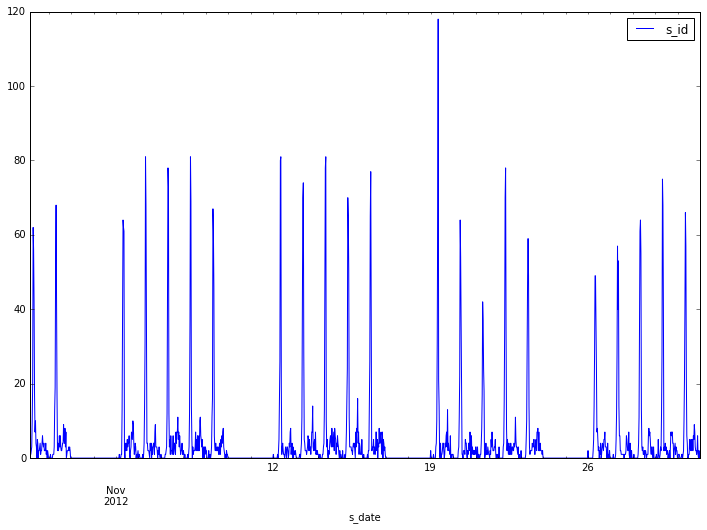

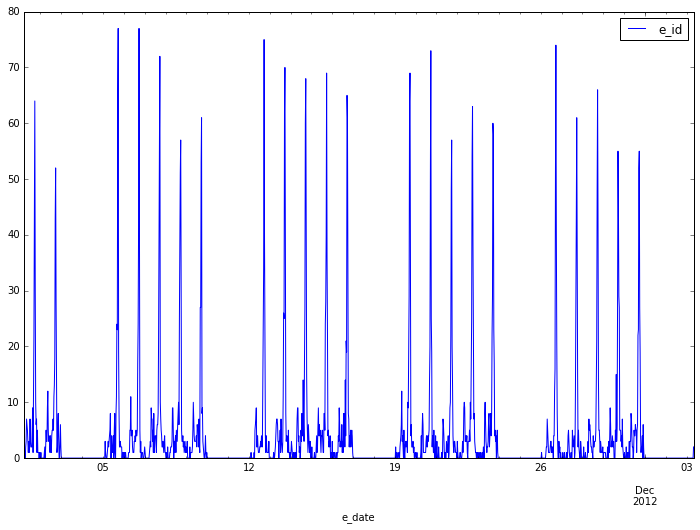

In [56]:
WeekE.plot(figsize=(12,8))
WeekEx.plot(figsize=(12,8))

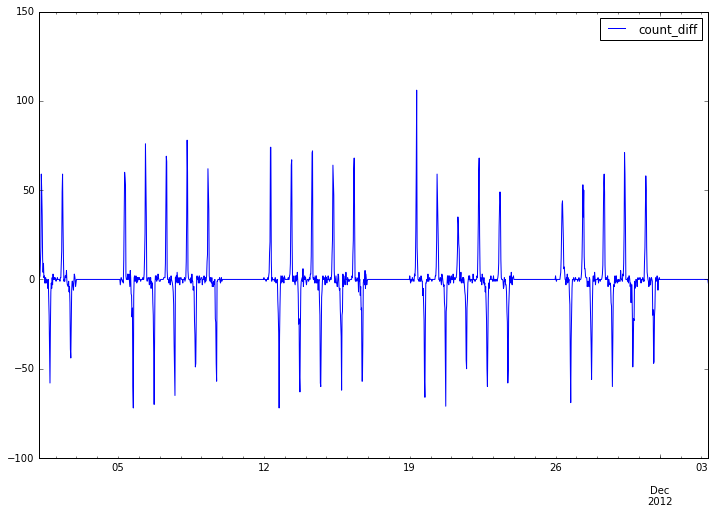

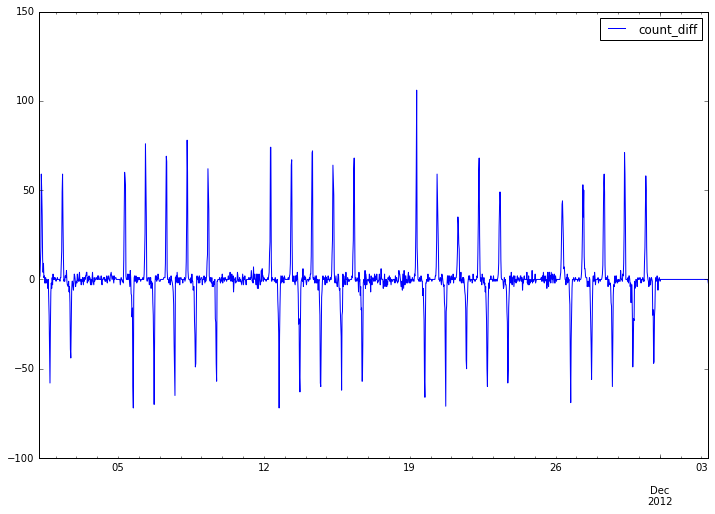

In [10]:
result.plot(x=result.index, y=['count_diff'],figsize=(12,8))
full_result.plot(x=full_result.index, y=['count_diff'],figsize=(12,8))

In [13]:
full_result.head()
DFout = full_result.drop(['e_id', 'count_diff'], axis=1)
DFout.s_id = DFout.s_id.astype(int)
DFout.head()

,s_id
2012-11-01 04:30:00,1
2012-11-01 05:00:00,1
2012-11-01 05:30:00,2
2012-11-01 06:00:00,3
2012-11-01 06:30:00,10


In [28]:
DFout.to_csv("14_November12_Entries.csv", header=["Entries"])

In [27]:
DFout.s_id = DFout.s_id.apply(lambda x: x+100)
DFout

,s_id
2012-11-01 04:30:00,101
2012-11-01 05:00:00,101
2012-11-01 05:30:00,102
2012-11-01 06:00:00,103
2012-11-01 06:30:00,110
2012-11-01 07:00:00,120
2012-11-01 07:30:00,162
2012-11-01 08:00:00,156
2012-11-01 08:30:00,142
2012-11-01 09:00:00,117


In [35]:
full_result.describe()
# full_result.count_diff.min
full_result.count_diff = full_result.count_diff.apply(lambda x: x+200)
DFout = full_result.drop(['e_id', 's_id'], axis=1)
DFout.describe()

,count_diff
count,1544.000000
mean,200.156736
std,15.577750
min,128.000000
25%,199.000000
50%,200.000000
75%,201.000000
max,306.000000


In [38]:
DFout.to_csv("14_November12_Difference.csv", header=["Difference"])